In [3]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('E:\Hamed\Projects\Python\Data Course\Data-Analysis\Lesson 1/enrollments.csv')
daily_engagement = read_csv('E:\Hamed\Projects\Python\Data Course\Data-Analysis\Lesson 1/daily_engagement.csv')
project_submissions = read_csv('E:\Hamed\Projects\Python\Data Course\Data-Analysis\Lesson 1/project_submissions.csv')

In [4]:
from datetime import datetime

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return datetime.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [5]:
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    engagement_record['account_key'] = engagement_record['acct']
    del(engagement_record['acct'])
    
daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

In [6]:
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [7]:
### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

def num_unique_students(caseList):
    listOfUiniqStudents = set()
    for row in caseList:
        listOfUiniqStudents.add(row['account_key'])
        
    return listOfUiniqStudents

In [8]:
enrollment_num_rows = len(enrollments)
print(enrollment_num_rows)
enrollment_num_unique_students = num_unique_students(enrollments)
print(len(enrollment_num_unique_students))

1640
1302


In [9]:
engagement_num_rows = len(daily_engagement)
print(engagement_num_rows)
engagement_num_unique_students = num_unique_students(daily_engagement)
print(len(engagement_num_unique_students))

136240
1237


In [10]:
submission_num_rows = len(project_submissions)
print(submission_num_rows)
submission_num_unique_students = num_unique_students(project_submissions)
print(len(submission_num_unique_students))

3642
743


In [11]:
for row in enrollments:
    student = row['account_key']
    if student not in engagement_num_unique_students:
        print(row)
        break

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


In [12]:
number_of_problem = 0
for row in enrollments:
    student = row['account_key']
    if student not in engagement_num_unique_students and row['join_date'] != row['cancel_date']:
        print(student)
        number_of_problem += 1
        print(row)
print(number_of_problem)

1304
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
1304
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
1101
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
3


In [13]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [14]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [15]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


In [16]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or int(enrollment['days_to_cancel']) > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date

print(len(paid_students))

995


In [17]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [18]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [19]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [20]:
def within_one_week (join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [21]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        
print(len(paid_engagement_in_first_week))

6919


In [22]:
from collections import defaultdict

def group_data (data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data (paid_engagement_in_first_week, 'account_key')

In [23]:
def sum_grouped_items (grouped_data, field_name):
    summed_data = {}
    
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
        
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()


def described_data (data):
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    '''plt.hist(data, edgecolor='black')'''

total_minutes = list(total_minutes_by_account.values())
described_data (total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [25]:
lessons_completed_by_account = sum_grouped_items (engagement_by_account, 'lessons_completed')

described_data (list(lessons_completed_by_account.values()))

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [26]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')

described_data(list(days_visited_by_account.values()))

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


In [27]:
def passing_engagement (data):
    subway_passing_code = ['746169184', '3176718735']
    passing_engagement = set()
    non_passing_engagement = set()
    for paragraf in range(len(data) - 1):
        account_key = data[paragraf]['account_key']
        lesson_key = data[paragraf]['lesson_key']
        rating = data[paragraf]['assigned_rating']
        if (lesson_key in subway_passing_code) and (rating == 'PASSED' or rating == 'DISTINCTION'):
            passing_engagement.add(account_key)
        else:
            non_passing_engagement.add(account_key)
            
    return { 'passing': passing_engagement, 'non_passing': non_passing_engagement }

In [28]:
print(len(passing_engagement(paid_submissions)['passing']))

647


In [29]:
passing_engagement_list = []
non_passing_engagement_list = []

for paragraf in paid_engagement_in_first_week:
    if paragraf['account_key'] in passing_engagement(paid_submissions)['passing']:
        passing_engagement_list.append(paragraf)
    else:
        non_passing_engagement_list.append(paragraf)
        
print(len(passing_engagement_list))
print(len(non_passing_engagement_list))

4527
2392


In [30]:
grouped_passing_engagement = group_data(passing_engagement_list, 'account_key')
grouped_non_passing_engagement = group_data(non_passing_engagement_list, 'account_key')

print(len(grouped_passing_engagement))
print(len(grouped_non_passing_engagement))

647
348


In [31]:
sum_of_minutes_passing_engagement = sum_grouped_items(grouped_passing_engagement, 'total_minutes_visited')
sum_of_minutes_non_passing_engagement = sum_grouped_items(grouped_non_passing_engagement, 'total_minutes_visited')
lessons_completed_passing_engagement = sum_grouped_items(grouped_passing_engagement, 'lessons_completed')
lessons_completed_non_passing_engagement = sum_grouped_items(grouped_non_passing_engagement, 'lessons_completed')
has_visited_passing_engagement = sum_grouped_items(grouped_passing_engagement, 'has_visited')
has_visited_non_passing_engagement = sum_grouped_items(grouped_non_passing_engagement, 'has_visited')

In [32]:
described_minutes_passing_engagement = described_data (list(sum_of_minutes_passing_engagement.values()))

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


In [33]:
described_minutes_non_passing_engagement = described_data (list(sum_of_minutes_non_passing_engagement.values()))

Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


In [34]:
described_lessons_passing_engagement = described_data (list(lessons_completed_passing_engagement.values()))

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


In [35]:
described_lessons_non_passing_engagement = described_data (list(lessons_completed_non_passing_engagement.values()))

Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


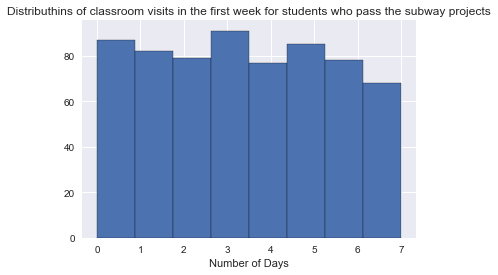

In [36]:
described_visited_passing_engagement = described_data (list(has_visited_passing_engagement.values()))
plt.hist(list(has_visited_passing_engagement.values()), bins = 8, edgecolor='black')
plt.xlabel('Number of Days')
plt.title('Distributhins of classroom visits in the first week for students who pass the subway projects')

Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


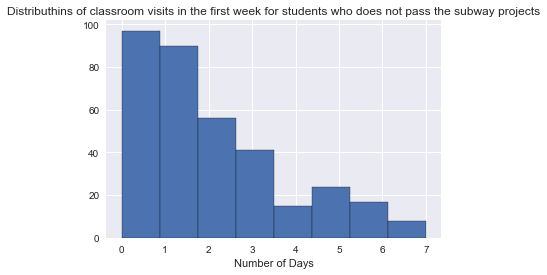

In [37]:
described_non_visited_passing_engagement = described_data (list(has_visited_non_passing_engagement.values()))
plt.hist(list(has_visited_non_passing_engagement.values()), bins = 8, edgecolor='black')
plt.xlabel('Number of Days')
plt.title('Distributhins of classroom visits in the first week for students who does not pass the subway projects')